In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Training KNN Classifier

In [ ]:
#import required libraries
import numpy as np
import pandas as pd

In [ ]:
#should use this version
!pip install pandas==1.5.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 4.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
#importing data
# data = pd.read_pickle('/content/full_data.pkl')

data = pd.read_pickle('/content/drive/MyDrive/COMP5450/full_data.pkl')


In [ ]:
#Visualising a sample of data
data.head(n=252000)

,induction,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,timestamp,label,R_mean
id,,,,,,,,,,,,,,,
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528,1.436027e+09,banana,11.119338
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299,1.436027e+09,banana,11.118926
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093,1.436027e+09,banana,11.118620
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905,1.436027e+09,banana,11.118453
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736,1.436027e+09,banana,11.118404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,28,-0.879614,12.6341,10.2077,10.3507,11.5348,11.4147,17.5518,5.74346,6.00018,26.8964,59.7768,1.438533e+09,wine,10.679680
251996,28,-0.879336,12.6342,10.2078,10.3509,11.5349,11.4149,17.5520,5.74356,6.00053,26.8958,59.7763,1.438533e+09,wine,10.679849
251997,28,-0.879058,12.6342,10.2078,10.3506,11.5345,11.4147,17.5514,5.74344,6.00050,26.8952,59.7758,1.438533e+09,wine,10.679642


In [ ]:
#Importing KNeighborsClassifier from Scikit-learn to train the model
#Importing metrics from Scikit-learn to check the accuracy of the model for each value of K
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report


In [ ]:
#Splitting the dataset into training and testing datasets with 80-20 balanced split
df1 = data[['Temp.', 'Humidity', 'R_mean' ]]
X = np.array(df1.values)
Y = np.array(data['label'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [ ]:
#Initializing lists to store train and test scores
k_values = []
train_scores = []
test_scores = []

**Plot the train error and test error for k=1-30**

**We iterate the k value from 1-30 and build a KNN model for each value of K and test the Train and Test Scores for each value of K and store them in respective lists**

In [ ]:
for k in range(1, 31):
    temp_knn_k = KNN(n_neighbors=k)
    temp_knn_k.fit(x_train,y_train)
    y_pred_temp_knn = temp_knn_k.predict(x_test)
    print(k, classification_report(y_pred_temp_knn, y_test, zero_division=False))
    train_score=temp_knn_k.score(x_train,y_train)
    test_score=temp_knn_k.score(x_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    k_values.append(k)

1               precision    recall  f1-score   support

  background       0.99      0.98      0.99     55140
      banana       0.96      0.96      0.96     61033
        wine       0.95      0.95      0.95     69626

    accuracy                           0.96    185799
   macro avg       0.97      0.97      0.97    185799
weighted avg       0.96      0.96      0.96    185799

2               precision    recall  f1-score   support

  background       0.99      0.98      0.99     55681
      banana       0.98      0.95      0.97     62536
        wine       0.95      0.98      0.96     67582

    accuracy                           0.97    185799
   macro avg       0.97      0.97      0.97    185799
weighted avg       0.97      0.97      0.97    185799

3               precision    recall  f1-score   support

  background       0.99      0.99      0.99     55160
      banana       0.96      0.96      0.96     60970
        wine       0.95      0.96      0.96     69669

    accuracy  

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.9856268635830311, 0.9823100894519855, 0.9828604183037493, 0.9810614215438271, 0.981387043994015, 0.9793929428734433, 0.9792583881419606, 0.9779289873949127, 0.9777688672644484, 0.9765632568703646, 0.9763762257936038, 0.9754262693893369, 0.9751504321897975, 0.9743417582535873, 0.9740793765271962, 0.9732881947060786, 0.9729396979515388, 0.9722830708619038, 0.971949375127827, 0.9714151928438411, 0.9711608844013391, 0.9706334298539274, 0.9703683570329067, 0.9697964994241057, 0.9695906306849374, 0.9690093542449326, 0.9687886844853012, 0.9682087535926114, 0.9679867382856651, 0.9674364094339013]
[0.9643001307864951, 0.9708286912200819, 0.965758696225491, 0.969585412192746, 0.9658609572710295, 0.9688319097519362, 0.9660331864003574, 0.9679277068229646, 0.9660654793621064, 0.9673141405497339, 0.965694110301993, 0.9667597780397096, 0.9652743017992562, 0.9661623582473533, 0.964666117

Text(0, 0.5, 'Scores')

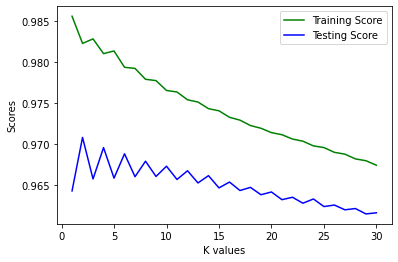

In [ ]:
#Importing Pyplot from Matplotlib to plot Train-test Scores
import matplotlib.pyplot as plt

print(k_values)
print(train_scores)
print(test_scores)

plt.plot(k_values,train_scores, color='green',label='Training Score')
plt.plot(k_values,test_scores, color='blue',label='Testing Score')

plt.legend(loc="best")
plt.xlabel('K values')
plt.ylabel('Scores')

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
# clf = LogisticRegression(random_state=0).fit(X, y)
# x_train, x_test, y_
# train, y_test = train_test_split(data, data['label'], test_size=0.2, random_state=10)
data.columns

df1 = data[['Temp.', 'Humidity', 'R_mean' ]]
X = np.array(df1.values)
Y = np.array(data['label'])

#Splitting the dataset into training and testing datasets with 80-20 balanced split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

clf = LogisticRegression(random_state=0).fit(x_train, y_train)

y_pred= clf.predict(x_test)
y_pred1 = clf.predict(x_train)
accuracy_score_LR= accuracy_score(y_test,y_pred)
print('accuracy for test set',accuracy_score_LR)
accuracy_score_LR1= accuracy_score(y_train,y_pred1)
print('accuracy for train set',accuracy_score_LR1)
# print(clf.score(x_train, y_train))
# print(clf.score(x_test, y_test))


accuracy for test set 0.4469776478883094
accuracy for train set 0.44860547476291457


#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the dataset into training and testing datasets with 80-20 balanced split

data1 = data.sample(n=100000,random_state=3)
df1 = data1[['Temp.', 'Humidity', 'R_mean' ]]
X = np.array(df1.values)
Y = np.array(data1['label'])

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [ ]:
model_linear_svm = SVC(kernel = 'linear')
model_rbf_svm = SVC(kernel = 'rbf')

#Training models with Linear, RBF kernals
model_linear_svm.fit(x_train,y_train)
print("Linear Model Trained")
model_rbf_svm.fit(x_train,y_train)
print("RBF Model Trained")

Linear Model Trained
RBF Model Trained


In [ ]:
#Testing the Trained models on the test set
y_pred_linear_svm = model_linear_svm.predict(x_test)
y_pred_rbf_svm = model_rbf_svm.predict(x_test)

#Checking the prediction results for models
print("Linear Model Predictions:")
print(y_pred_linear_svm)
print("RBF Model Predictions:")
print(y_pred_rbf_svm)


#Finding Classification Reports for models
class_rep_linear_svm=classification_report(y_test,y_pred_linear_svm)
class_rep_rbf_svm=classification_report(y_test,y_pred_rbf_svm)

#Printing Classification Reports
print('SVM with Linear Kernel')
print(class_rep_linear_svm)
print('SVM with RBF Kernel')
print(class_rep_rbf_svm)

#Finding accuracy
accuracy_score_linear_svm=accuracy_score(y_test,y_pred_linear_svm)
accuracy_score_rbf_svm=accuracy_score(y_test,y_pred_rbf_svm)

#Printing Accuracy Scores of models
print('SVM with Linear Kernel')
print("Accuracy Score: ", accuracy_score_linear_svm)
print('SVM with RBF Kernel')
print("Accuracy Score: ", accuracy_score_rbf_svm)


Linear Model Predictions:
['wine' 'background' 'wine' ... 'wine' 'background' 'background']
RBF Model Predictions:
['wine' 'background' 'wine' ... 'wine' 'background' 'background']
SVM with Linear Kernel
              precision    recall  f1-score   support

  background       0.52      0.61      0.56      5898
      banana       0.63      0.03      0.05      6600
        wine       0.43      0.74      0.55      7502

    accuracy                           0.47     20000
   macro avg       0.53      0.46      0.39     20000
weighted avg       0.52      0.47      0.39     20000

SVM with RBF Kernel
              precision    recall  f1-score   support

  background       0.55      0.66      0.60      5898
      banana       0.47      0.21      0.29      6600
        wine       0.44      0.59      0.51      7502

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.47     20000
weighted avg       0.48      0.49      0.46     20000

SVM with Linea

#MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

data1 = data.sample(n=200000,random_state=3)
df1 = data1[['Temp.', 'Humidity', 'R_mean' ]]
X = np.array(df1.values)
Y = np.array(data1['label'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# mlp_clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,50,25),max_iter = 300,activation = 'relu',solver = 'adam')
mlp_clf.fit(x_train,y_train)

y_pred = mlp_clf.predict(x_test)

print(y_pred[:5])

print(classification_report(y_test, y_pred))

accuracy_score_mlp = accuracy_score(y_test,y_pred)

print('Accuracy for this model:',accuracy_score_mlp)


['background' 'wine' 'wine' 'background' 'wine']
              precision    recall  f1-score   support

  background       0.76      0.82      0.79     11977
      banana       0.69      0.72      0.71     12936
        wine       0.75      0.67      0.71     15087

    accuracy                           0.73     40000
   macro avg       0.73      0.74      0.73     40000
weighted avg       0.73      0.73      0.73     40000

Accuracy for this model: 0.733175


In [ ]:
# #df1.sample(n=10,random_state=1)
# df2 = data['label']
# df2.sample(n=20000,random_state=2)
# # Y = np.array(data['label'].sample(n=20000, random_state=3))
# # print(Y)
# df1 = data[['Temp.', 'Humidity', 'R_mean' ]].sample(n=20000,random_state=3)
# print(df1)
# df2 = data['label'].sample(n=20000,random_state=2)
# print(df2)
# data1 = data.sample(n=200000,random_state=3)
# df1 = data1[['Temp.', 'Humidity', 'R_mean' ]]
# X = np.array(df1.values)
# print(df1)